In [1]:
# Data Preparation
from pandas import read_csv, DataFrame
from dslabs_functions import get_variable_types, encode_cyclic_variables, dummify

In [2]:
file_tag = "cyber_attacks"
filename = "C:\\Users\\LENOVO\\Documents\\Projetos\\Data_science\\telecom_churn_dataset\\Telecom_Customers_Churn.csv"

data: DataFrame = read_csv(filename, index_col="customerID", na_values=" ")
vars: dict[str, list] = get_variable_types(data)

yes_no: dict[str, int] = {"no": 0, "No": 0, "yes": 1, "Yes": 1}
gender_values: dict[str, int] = {"Male": 0, "Female": 1}
multiple_lines_values: dict[str, int] = {"No phone service": 0, "no": 0, "No": 0, "Yes": 1, "yes": 1}
payment_method_values: dict[str, int] = {"Mailed check": 0, "Electronic check": 1,"Bank transfer (automatic)": 2, "Credit card (automatic)": 3}
INET_values: dict[str, int] = {"No": 0, "DSL": 1, "Fiber optic": 2} 
internet_service_values: dict[str, int] = {"No": 0, "No internet service": 0, "Yes": 1, "yes": 1}

encoding: dict[str, dict[str, int]] = {
    "gender": gender_values,
    "Partner": yes_no,
    "Dependents": yes_no,
    "PhoneService": yes_no,
    "MultipleLines": multiple_lines_values,
    "InternetService": INET_values,
    "OnlineSecurity": internet_service_values,
    "OnlineBackup": internet_service_values,
    "DeviceProtection": internet_service_values,
    "TechSupport": internet_service_values,
    "StreamingTV": internet_service_values,
    "StreamingMovies": internet_service_values,
    "PaperlessBilling": yes_no,
    "PaymentMethod": payment_method_values,
    "Churn": yes_no,
}
df: DataFrame = data.replace(encoding, inplace=False)
df.head()



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,1,0,0,1,0,1,0,0,0,0,Month-to-month,1,1,29.85,29.85,0
5575-GNVDE,0,0,0,0,34,1,0,1,1,0,1,0,0,0,One year,0,0,56.95,1889.50,0
3668-QPYBK,0,0,0,0,2,1,0,1,1,1,0,0,0,0,Month-to-month,1,0,53.85,108.15,1
7795-CFOCW,0,0,0,0,45,0,0,1,1,0,1,1,0,0,One year,0,2,42.30,1840.75,0
9237-HQITU,1,0,0,0,2,1,0,2,0,0,0,0,0,0,Month-to-month,1,1,70.70,151.65,1


In [3]:
from numpy import ndarray
from pandas import DataFrame, read_csv, concat
from sklearn.preprocessing import OneHotEncoder


def dummify(df: DataFrame, vars_to_dummify: list[str]) -> DataFrame:
    other_vars: list[str] = [c for c in df.columns if not c in vars_to_dummify]

    enc = OneHotEncoder(
        handle_unknown="ignore", sparse_output=False, dtype="bool", drop="if_binary"
    )
    trans: ndarray = enc.fit_transform(df[vars_to_dummify])

    new_vars: ndarray = enc.get_feature_names_out(vars_to_dummify)
    dummy = DataFrame(trans, columns=new_vars, index=df.index)

    final_df: DataFrame = concat([df[other_vars], dummy], axis=1)
    return final_df


filename = "C:\\Users\\LENOVO\\Documents\\Projetos\\Data_science\\telecom_churn_dataset\\Telecom_Customers_Churn.csv"

data: DataFrame = read_csv(filename, index_col="customerID", na_values=" ")

vars: list[str] = ["Contract"]
df: DataFrame = dummify(df, vars)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,1,0,0,1,0,1,...,0,0,1,1,29.85,29.85,0,True,False,False
5575-GNVDE,0,0,0,0,34,1,0,1,1,0,...,0,0,0,0,56.95,1889.50,0,False,True,False
3668-QPYBK,0,0,0,0,2,1,0,1,1,1,...,0,0,1,0,53.85,108.15,1,True,False,False
7795-CFOCW,0,0,0,0,45,0,0,1,1,0,...,0,0,0,2,42.30,1840.75,0,False,True,False
9237-HQITU,1,0,0,0,2,1,0,2,0,0,...,0,0,1,1,70.70,151.65,1,True,False,False


In [4]:
print(df.head(5))

            gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
customerID                                                                     
7590-VHVEG       1              0        1           0       1             0   
5575-GNVDE       0              0        0           0      34             1   
3668-QPYBK       0              0        0           0       2             1   
7795-CFOCW       0              0        0           0      45             0   
9237-HQITU       1              0        0           0       2             1   

            MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
customerID                                                                ...   
7590-VHVEG              0                1               0             1  ...   
5575-GNVDE              0                1               1             0  ...   
3668-QPYBK              0                1               1             1  ...   
7795-CFOCW              0         

In [5]:
df.dtypes

gender                       int64
SeniorCitizen                int64
Partner                      int64
Dependents                   int64
tenure                       int64
PhoneService                 int64
MultipleLines                int64
InternetService              int64
OnlineSecurity               int64
OnlineBackup                 int64
DeviceProtection             int64
TechSupport                  int64
StreamingTV                  int64
StreamingMovies              int64
PaperlessBilling             int64
PaymentMethod                int64
MonthlyCharges             float64
TotalCharges               float64
Churn                        int64
Contract_Month-to-month       bool
Contract_One year             bool
Contract_Two year             bool
dtype: object

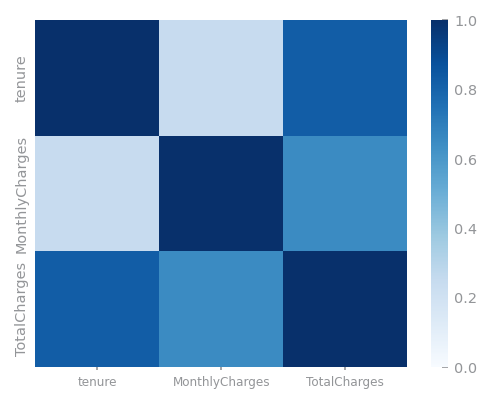

In [8]:
# Figure 3 - Data Dimensionality - #Missing/Variables - after encoding
from pandas import read_csv, DataFrame
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

# Figure 17 - Correlation analysis
from pandas import to_numeric
from seaborn import heatmap
from dslabs_functions import get_variable_types

variables_types: dict[str, list] = get_variable_types(data)
numeric: list[str] = variables_types["numeric"]
corr_mtx: DataFrame = data[numeric].corr().abs()

figure()
heatmap(
    abs(corr_mtx),
    xticklabels=numeric,
    yticklabels=numeric,
    annot=False,
    cmap="Blues",
    vmin=0,
    vmax=1,
)
#savefig(f"images/17_{file_tag}_correlation_analysis.png")
show()